In [1]:
import pandas as pd
import numpy as np
import scanpy.api as sc

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=150, color_map='viridis')
sc.logging.print_versions()
out_path = "/media/kevin/89a56127-927e-42c0-80de-e8a834dc81e8/rosmap_snRNAseq/"
data_path = "/media/kevin/89a56127-927e-42c0-80de-e8a834dc81e8/rosmap_snRNAseq/data/"

/home/kevin/anaconda3/envs/scaden/lib/python3.6/site-packages/scanpy/api/__init__.py:6: FutureWarning: 

In a future version of Scanpy, `scanpy.api` will be removed.
Simply use `import scanpy as sc` and `import scanpy.external as sce` instead.

  FutureWarning


scanpy==1.4.4 anndata==0.6.22.post1 umap==0.3.10 numpy==1.16.4 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.2 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


# Load data

In [24]:
adata = sc.read(data_path + "filtered_count_matrix.mtx", cache=True).T
genes = list(pd.read_csv(data_path + "filtered_gene_row_names.txt", sep="\t", header=None)[0])
adata.var_names = genes
md = pd.read_csv(data_path + "filtered_column_metadata.txt", sep="\t")
adata.obs_names = md['TAG']

... reading from cache file cache/media-kevin-89a56127-927e-42c0-80de-e8a834dc81e8-rosmap_snRNAseq-data-filtered_count_matrix.h5ad


In [25]:
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_genes(adata, min_cells=5)
adata.obs['n_counts'] = adata.X.sum(axis=1)

filtered out 13765 cells that haveless than 500 genes expressed
filtered out 367 genes that are detectedin less than 5 cells


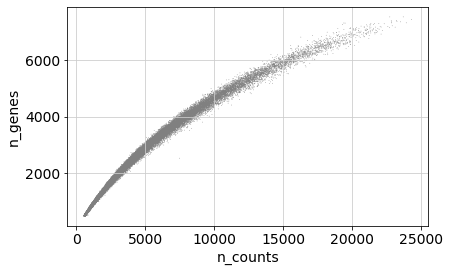

In [26]:
sc.pl.scatter(adata, x="n_counts", y='n_genes')

In [27]:
# Filter
adata = adata[adata.obs['n_genes'] < 7000, :]
adata = adata[adata.obs['n_counts'] < 20000, :]
# Normalize per cell
sc.pp.normalize_per_cell(adata)

normalizing by total count per cell


Trying to set attribute `.obs` of view, making a copy.


    finished (0:00:02): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


extracting highly variable genes
    finished (0:00:05)


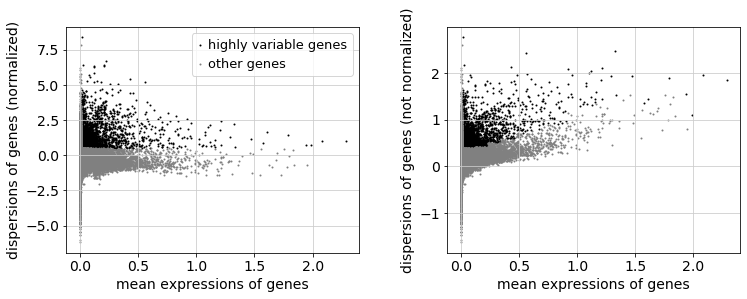

In [28]:
filter_result = sc.pp.filter_genes_dispersion(adata.X, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.filter_genes_dispersion(filter_result)

In [29]:
adata = adata[:, filter_result.gene_subset]
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.regress_out(adata, ['n_counts'])
sc.pp.scale(adata)

normalizing by total count per cell


Trying to set attribute `.obs` of view, making a copy.


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
regressing out ['n_counts']
    sparse input is densified and may lead to high memory use
    finished (0:02:11)


In [30]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 50
    finished (0:00:04)


/home/kevin/anaconda3/envs/scaden/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/envs/scaden/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/home/kevin/anaconda3/envs/scaden/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../anaconda3/envs/sca

    finished (0:00:40)
computing UMAP
    finished (0:02:04)


In [31]:
sc.tl.louvain(adata, resolution=0.5)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:30)


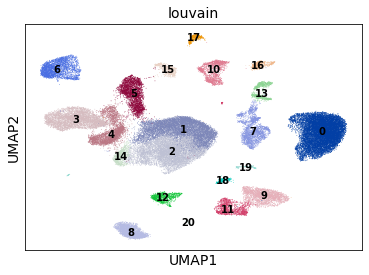

In [32]:
sc.pl.umap(adata, color='louvain',  legend_loc='on data')